In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import chama
from matplotlib.colors import LogNorm 
from matplotlib.colors import Normalize
import random
import matplotlib as mpl
import utm

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size':14})

In [2]:
data = pd.read_csv('UWM_Egen_latlons.csv')
# Define the radius of the Earth in meters
earth_radius = 6371000  # Approximate value for the Earth's radius

# Define your lists of latitudes and longitudes
latitudes = data['Latitude']
longitudes = data['Longitude']

# Get the reference lat-lon (the first point in the list)
ref_lat, ref_lon = latitudes[0], longitudes[0]

# Convert the reference lat-lon to meters
ref_lat_rad = np.radians(ref_lat)
ref_lon_rad = np.radians(ref_lon)
ref_x = earth_radius * ref_lon_rad
ref_y = earth_radius * np.log(np.tan((np.pi / 4) + (ref_lat_rad / 2)))

# Convert latitudes and longitudes to meters relative to the reference point
x_coords = []
y_coords = []

for lat, lon in zip(latitudes, longitudes):
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)

    x = earth_radius * lon_rad - ref_x
    y = earth_radius * np.log(np.tan((np.pi / 4) + (lat_rad / 2))) - ref_y

    x_coords.append(x)
    y_coords.append(y)

output_data = data.copy()
output_data['X'] = x_coords
output_data['Y'] = y_coords

In [3]:
wind_dataa = pd.read_csv('wind_data_1hr_madison_sept11.csv') 

In [4]:
wellpads = output_data.copy()
#this is to select indices to print on the map
#selected_buildings = np.random.choice(wellpads['Building'], 5, replace=False)
selected_indices = [1, 52, 104, 115]  # Replace these indices with your chosen indices

In [5]:
efdata = pd.read_excel('AP42_EF_lbs.xlsx')
merged_efdata = pd.merge(wellpads,efdata, on='Fuel', how='left')

In [6]:
## EMISSION FACTOR

###Select pollutant from: PM, CO, NOX, SO2
pollutantlist = ['PM','CO','NOX','SO2']
pollutant = pollutantlist[2]

lrates = (merged_efdata['HP'] * merged_efdata[pollutant]) * 0.453592 / 3600 #kg/s
stackheight = 3 #m
xsize = 9000 # m
ysize = 9000 # m
zsize = 10 # m

dx = 1000 # m
dy = 1000 # m
dz = 1 # m

### Build the x,y,z,t grid
xar = np.arange(-xsize, xsize, dx)
yar = np.arange(-ysize, ysize, dy)
zar = np.arange(0, zsize, dz)
grid = chama.simulation.Grid(xar, yar, zar)

### Generate plume signal data (for each wellpad and realization)
signal = pd.DataFrame()
info = []
for index, wellpad in wellpads.iterrows():
    x = wellpad['Y']
    y = wellpad['X']
    z = stackheight
    scenario_name = 'Stack' + str(index)
    print(scenario_name)
    leakrate = lrates[index]
    info.append([scenario_name, leakrate, x, y, z])
    
    source = chama.simulation.Source(x, y, z, leakrate)
    gauss_plume = chama.simulation.GaussianPlume(grid, source, wind_dataa)
    gauss_plume.run()
    conc = gauss_plume.conc
    # rename the scenario S to a unique scenario name
    conc = conc.rename(columns={'S': scenario_name})
    if signal is None:
        signal = conc
    else:
        signal[scenario_name] = conc[scenario_name]

            
signal['X'] = conc['X'].values
signal['Y'] = conc['Y'].values
signal['Z'] = conc['Z'].values

ss = signal.copy()
ss = ss[ss['Z'] == 0]
ss = ss.groupby(by=['X', 'Y'],as_index=0).mean() #temporal mean
# ss = ss[ss['T'] == 3600]

## ADD CONTRIBUTIONS FROM ALL STACKS
sus = []
for i in range(0,119):
    sus.append(ss['Stack' + str(i)].values)

sus_sum = np.sum(sus, axis=0)

Stack0
Stack1
Stack2
Stack3
Stack4
Stack5
Stack6
Stack7
Stack8
Stack9
Stack10
Stack11
Stack12
Stack13
Stack14
Stack15
Stack16
Stack17
Stack18
Stack19
Stack20
Stack21
Stack22
Stack23
Stack24
Stack25
Stack26
Stack27
Stack28
Stack29
Stack30
Stack31
Stack32
Stack33
Stack34
Stack35
Stack36
Stack37
Stack38
Stack39
Stack40
Stack41
Stack42
Stack43
Stack44
Stack45
Stack46
Stack47
Stack48
Stack49
Stack50
Stack51
Stack52
Stack53
Stack54
Stack55
Stack56
Stack57
Stack58
Stack59
Stack60
Stack61
Stack62
Stack63
Stack64
Stack65
Stack66
Stack67
Stack68
Stack69
Stack70
Stack71
Stack72
Stack73
Stack74
Stack75
Stack76
Stack77
Stack78
Stack79
Stack80
Stack81
Stack82
Stack83
Stack84
Stack85
Stack86
Stack87
Stack88
Stack89
Stack90
Stack91
Stack92
Stack93
Stack94
Stack95
Stack96
Stack97
Stack98
Stack99
Stack100
Stack101
Stack102
Stack103
Stack104
Stack105


<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal[scenario_name] = conc[scenario_name]
<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal[scenario_name] = conc[scenario_name]
<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Stack106
Stack107
Stack108
Stack109
Stack110
Stack111


<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal[scenario_name] = conc[scenario_name]
<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal[scenario_name] = conc[scenario_name]
<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Stack112
Stack113
Stack114
Stack115
Stack116
Stack117


<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal[scenario_name] = conc[scenario_name]
<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal[scenario_name] = conc[scenario_name]
<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Stack118


<ipython-input-6-240d4ad2c6b6>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal[scenario_name] = conc[scenario_name]
<ipython-input-6-240d4ad2c6b6>:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signal['X'] = conc['X'].values
<ipython-input-6-240d4ad2c6b6>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

In [7]:
unitdata = pd.read_excel('UnitConversionPollutant.xlsx').set_index('Pollutant')
conversionfac = unitdata.loc[pollutant][0]
epalim = unitdata.loc[pollutant][2]
units = unitdata.loc[pollutant][1]

<ipython-input-8-6860710ddb98>:11: UserWarning: Log scale: values of z <= 0 have been masked
  contourff = plt.contourf(x_values, y_values, concentrations*conversionfac, cmap=cmap, levels = bounds, norm=LogNorm(), alpha = 0.7)


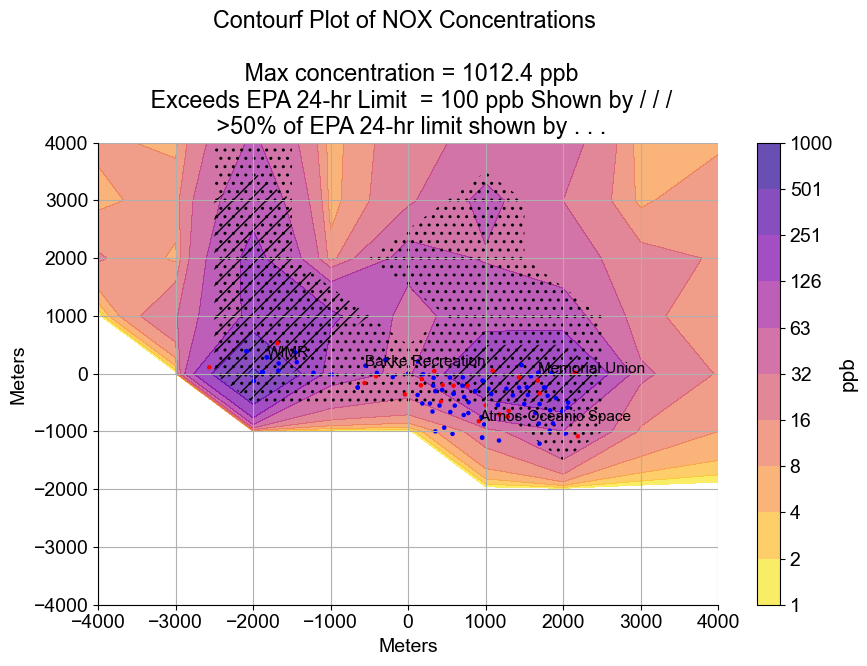

In [8]:
cmap = 'plasma_r'
plt.figure(figsize=(10, 6))
x_values = ss['X'].values.reshape(int(xsize*2/dx), int(ysize*2/dy))
y_values = ss['Y'].values.reshape(int(xsize*2/dx), int(ysize*2/dy))
concentrations = sus_sum.reshape(int(xsize*2/dx), int(ysize*2/dy)).T

bounds = np.geomspace(1,1000,11)  # Adjust the range and number of levels as needed


contourff = plt.contourf(x_values, y_values, concentrations*conversionfac, cmap=cmap, levels = bounds, norm=LogNorm(), alpha = 0.7)
#plt.contour(x_values, y_values, concentrations * conversionfac, levels=[epalim/2], colors='k', linewidths=1, linestyles='dashed', hatches=['//'])

newc = np.zeros((18,18))
for i in range(0,18):
    for j in range(0,18):
        if concentrations[j,i]*conversionfac > epalim:
            newc[j,i] = 1

newc2 = np.zeros((18,18))
for i in range(0,18):
    for j in range(0,18):
        if epalim/2 < concentrations[j,i]*conversionfac:
            newc2[j,i] = 1


plt.contourf(x_values, y_values, newc, 1, hatches=['','//'], colors = 'none', alpha = 0)
plt.contourf(x_values, y_values, newc2, 1, hatches=['','..'], colors = 'none', alpha = 0)

#plt.scatter(wellpads['X'], wellpads['Y'], c='k', s=5)  # Adjusted marker size
scatter = plt.scatter(wellpads['X'], wellpads['Y'], c=merged_efdata['Fuel'].map({'NG': 'red', 'Diesel': 'blue'}), s=5)  # Adjusted marker size



for index in selected_indices:
    # Get the row corresponding to the selected index
    building_row = wellpads.iloc[index]
    
    # Extract X and Y coordinates
    x_point, y_point = building_row['X'], building_row['Y']
    
    # Trim the building name to two words
    trimmed_building = ' '.join(building_row['Building'].split()[:2])
    
    # Annotate the plot
    plt.text(x_point, y_point, trimmed_building, fontsize=11, color='k')


cbar = plt.colorbar(contourff, format='%.0f', ticks = bounds)
cbar.set_label(units, fontsize=15)
plt.xlabel('Meters')  # Add x-axis label if applicable
plt.ylabel('Meters')  # Add y-axis label if applicable
#plt.title('Contourf Plot of Concentrations \n Max concentration = ' + str(np.round(np.max(concentrations * 1e9), 1)) + ' ' + units + '\n EPA 24-hr Limit  = ' + str(epalim) + ' ' + units + ' Shown by - - -')
plt.title('Contourf Plot of ' + pollutant + ' Concentrations \n\n Max concentration = ' + str(np.round(np.max(concentrations * 1e9), 1)) + ' ' + units + '\n Exceeds EPA 24-hr Limit  = ' + str(epalim) + ' ' + units + ' Shown by / / /' + '\n >50% of EPA 24-hr limit shown by . . .')

plt.grid(True)
plt.xlim(-4000,4000)
plt.ylim(-4000,4000)

# plt.savefig('GPM.pdf')
plt.show()